In [41]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from glob import glob

import keras
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

In [42]:
#path = '/home/viswanath/Desktop/Myfiles/AML/Capstone/Data/'
path = '/Users/vishy/Files/Kaggle/Whale/Data/'
train = os.listdir(path+'/train')
#Get the list of test files
test = os.listdir(path+'/test')

print("Number of training images:", len(train))
print("Number of test images:", len(test))


## get the file name of the images## get  
train_images = glob(path+"/train/*jpg")
test_images = glob(path+"/test/*jpg")

Number of training images: 9850
Number of test images: 15610


In [44]:
train_images[:5]

['/Users/vishy/Files/Kaggle/Whale/Data//train/18fadb00.jpg',
 '/Users/vishy/Files/Kaggle/Whale/Data//train/2712c81f.jpg',
 '/Users/vishy/Files/Kaggle/Whale/Data//train/0b0138cb.jpg',
 '/Users/vishy/Files/Kaggle/Whale/Data//train/15bdbe1a.jpg',
 '/Users/vishy/Files/Kaggle/Whale/Data//train/477fd881.jpg']

In [45]:
## read the training csv
df = pd.read_csv(path+'/train_label.csv')

In [46]:
df["Image"] = df["Image"].map( lambda x : "/Users/vishy/Files/Kaggle/Whale/Data/train/"+x)
df.head(5)

,Image,Id
0,/Users/vishy/Files/Kaggle/Whale/Data/train/000...,w_e15442c
1,/Users/vishy/Files/Kaggle/Whale/Data/train/000...,w_1287fbc
2,/Users/vishy/Files/Kaggle/Whale/Data/train/000...,w_da2efe0
3,/Users/vishy/Files/Kaggle/Whale/Data/train/001...,w_19e5482
4,/Users/vishy/Files/Kaggle/Whale/Data/train/001...,w_f22f3e3


In [47]:
ImageToLabelDict = dict(zip(df["Image"], df["Id"]))

In [48]:
from PIL import Image,ImageChops

In [49]:
SIZE = (224, 224)

def import_images(filename):
    img = Image.open(filename).resize(SIZE)
    img = np.array(img)
    if img.ndim == 2: #imported BW picture and converting to "dumb RGB"
        img = np.tile(img, (3,1,1)).transpose((1,2,0))
    return img
train_imgs = np.array([import_images(img) for img in train_images])

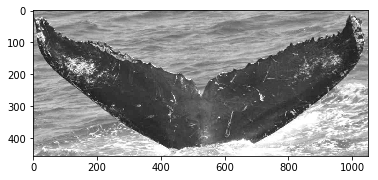

In [50]:
img_path = df.Image[7]
img = mpimg.imread(img_path)
plt.imshow(img)
plt.show()

In [51]:
train_imgs.shape

(9850, 224, 224, 3)

In [52]:
x_train = train_imgs.reshape( (-1, 224, 224, 3)).astype("float32")

In [53]:
x_train.shape

(9850, 224, 224, 3)

In [54]:
test_imgs = np.array([import_images(img) for img in test_images])

x_test = test_imgs
x_test.shape

(15610, 224, 224, 3)

In [ ]:
class LabelOneHotEncoder():
    def __init__(self):
        self.ohe = OneHotEncoder()
        self.le = LabelEncoder()
    def fit_transform(self, x):
        features = self.le.fit_transform( x)
        return self.ohe.fit_transform( features.reshape(-1,1))
    def transform( self, x):
        return self.ohe.transform( self.la.transform( x.reshape(-1,1)))
    def inverse_tranform( self, x):
        return self.le.inverse_transform( self.ohe.inverse_tranform( x))
    def inverse_labels( self, x):
        return self.le.inverse_transform( x)

In [ ]:
y = list(map(ImageToLabelDict.get, train_images))
lohe = LabelOneHotEncoder()
y_cat = lohe.fit_transform(y)

In [ ]:
y_train = y_cat

In [ ]:
#constructing class weights
WeightFunction = lambda x : 1./x**0.75
ClassLabel2Index = lambda x : lohe.le.inverse_tranform( [[x]])
CountDict = dict( df["Id"].value_counts())
class_weight_dic = { lohe.le.transform( [image_name])[0] : WeightFunction(count) for image_name, count in CountDict.items()}
del CountDict

In [ ]:
input_shape = x_train[0].shape

In [ ]:
y_train = pd.get_dummies(df.Id)
y_train = np.asmatrix(y_train)
y_train

In [ ]:
print(len(y_train[0]))
print(y_train.shape)

In [ ]:
# Set the random seed
random_seed = 42

# Split the train and the validation set for the fitting
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=random_seed)

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [ ]:
batch_size = 128
num_classes = 4251
epochs = 5

In [ ]:
from keras.applications import VGG16
vgg_model = VGG16()

print(type(vgg_model))
vgg_model.summary()

In [ ]:
# Create the model
model = Sequential()

for layer in vgg_model.layers:
    model.add(layer)

model.summary()

In [ ]:
model.layers.pop()

In [ ]:
for layer in model.layers:
    layer.trainable = False
    

modelmodel..addadd((DenseDense((num_classesnum_clas , activation='softmax'))
model.summary()

In [ ]:
from keras.optimizers import Adam
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer = Adam(lr=1e-4),
              metrics=['accuracy'])
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
          steps_per_epoch=  x_train.shape[0]//batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, y_val), #For speed
          class_weight='auto')

In [ ]:
from keras.optimizers import Adam
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer = Adam(lr=1e-4),
              metrics=['accuracy'])
model.fit_generator(datagen.flow(x_train, y_train, batch_size=256),
          steps_per_epoch=  x_train.shape[0]//256,
          epochs=20,
          verbose=1,
          validation_data=(x_val, y_val), #For speed
          class_weight='auto')

In [ ]:
import warnings
from os.path import split

with open(path+"sample_submission.csv","w") as f:
    with warnings.catch_warnings():
        f.write("Image,Id\n")
        warnings.filterwarnings("ignore",category=DeprecationWarning)
        for image in test_images:
            img = ImportImage( image)
            x = img.astype( "float32")
            #applying preprocessing to test images
            x = image_gen.standardize( x.reshape(1,SIZE,SIZE))
            
            y = model.predict_proba(x.reshape(1,SIZE,SIZE,1))
            predicted_args = np.argsort(y)[0][::-1][:5]
            predicted_tags = lohe.inverse_labels( predicted_args)
            image = split(image)[-1]
            predicted_tags = " ".join( predicted_tags)
            f.write("%s,%s\n" %(image, predicted_tags))